# Réduction de dimensions

## Analyse en Composantes Principales

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

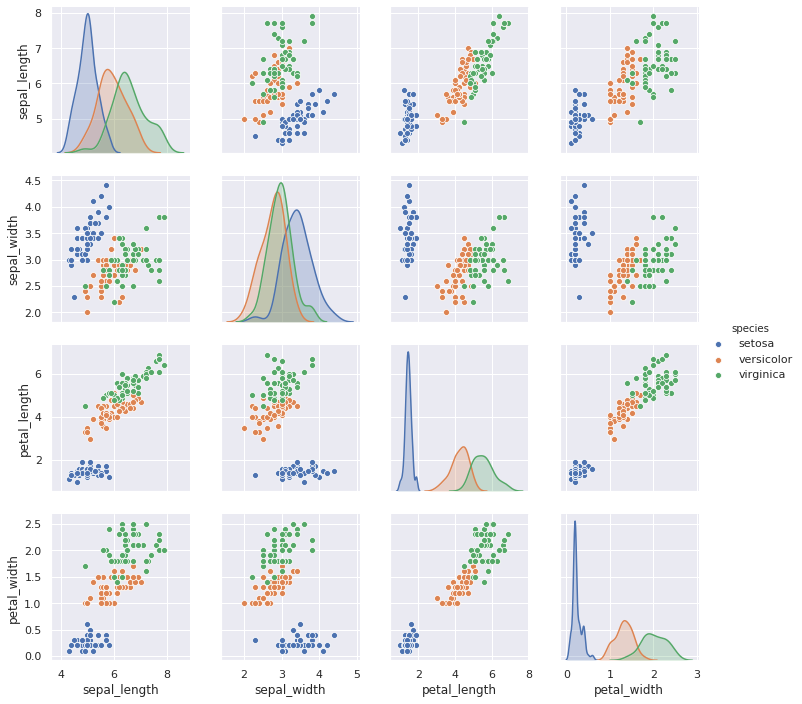

In [4]:
iris_df= sns.load_dataset("iris")
sns.pairplot(iris_df, hue='species')

In [5]:
iris_df.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(18,8))
for fig_idx, f in enumerate(iris_df.columns[:-1], start=1):
    features = list(iris_df.columns[:-1])
    features.remove(f)
    ax = fig.add_subplot(1, len(iris_df.columns[:-1]), fig_idx, projection='3d')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    surf = ax.scatter(iris_df[features[0]], iris_df[features[1]], iris_df[features[2]], c=iris_df['species'].astype("category").cat.codes, edgecolor='k')

In [7]:
import sklearn.datasets
digits = sklearn.datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
X.shape

(1797, 64)

In [8]:
1797/32

56.15625

In [9]:
import numpy as np

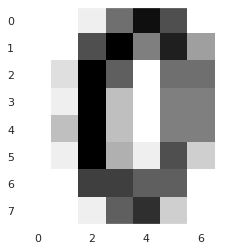

In [10]:
indiv= 10
plt.rcParams["axes.grid"] = False
plt.imshow(X[indiv].reshape(8,8), cmap=plt.cm.binary) 
plt.show() 

Text(0.5, 1.0, '800 premiers éléments (sur 1797) du jeu de données')

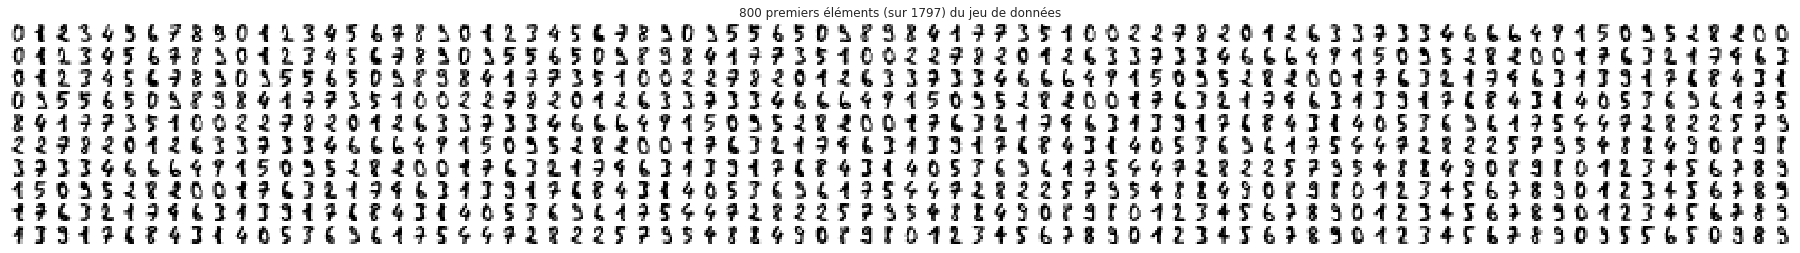

In [11]:

n_img_per_row = 10
n_img_per_col = 80

img = np.zeros((10 * n_img_per_row, 10 * n_img_per_col))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_col):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

fig = plt.figure(figsize=(32,8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("{} premiers éléments (sur {}) du jeu de données".format(n_img_per_row*n_img_per_col, X.shape[0]))

In [12]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(X[:, 5], X[:, 11], X[:,25], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.show()

In [13]:
import sklearn.decomposition

In [14]:
pca = sklearn.decomposition.PCA(n_components=3)
pca.fit(X)
X_3d = pca.transform(X)
X_3d.shape

(1797, 3)

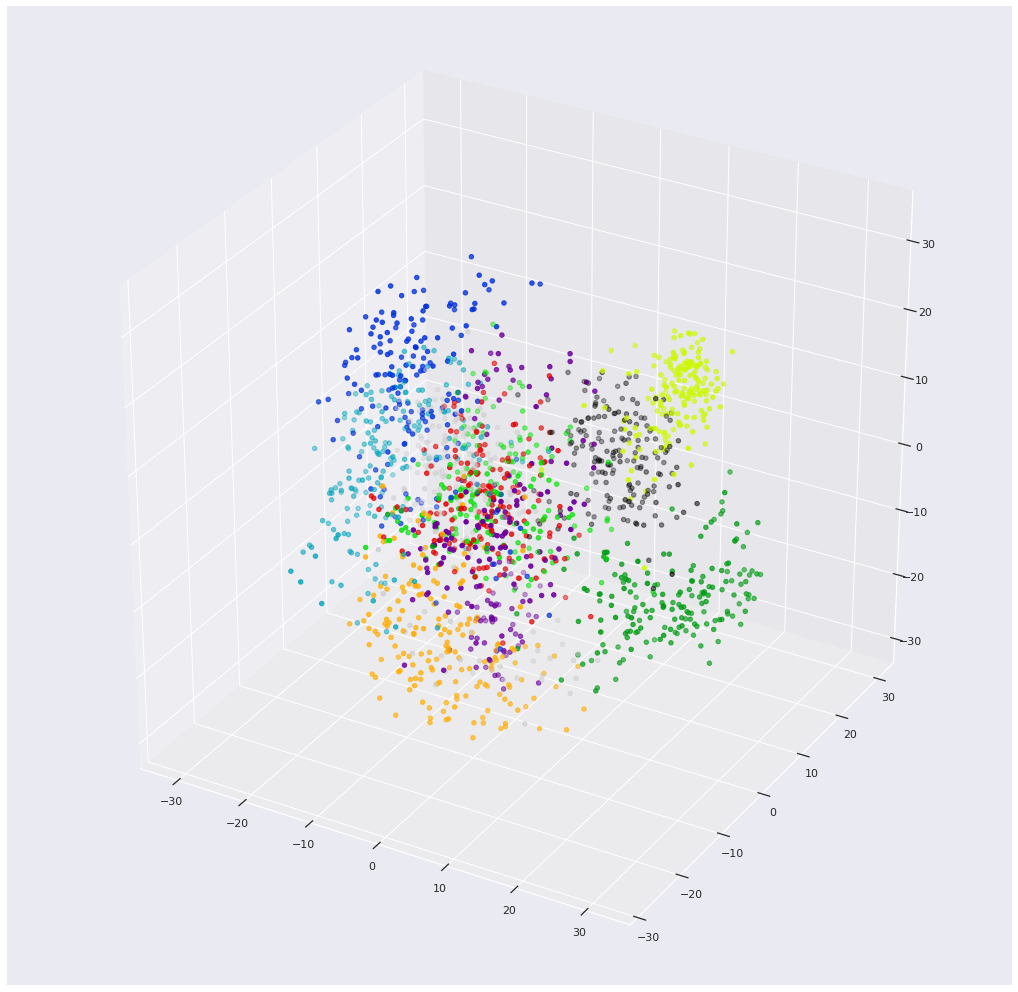

In [15]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:,2], c=y, cmap=plt.cm.nipy_spectral)
plt.show()

In [16]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for digit in range(10):
    selected= (y==digit)
    ax.scatter(X_3d[selected, 0], X_3d[selected, 1], X_3d[selected,2], cmap=plt.cm.nipy_spectral, label=str(digit))
plt.legend()
plt.show()

In [17]:
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(X)
X_2d = pca.transform(X)
X_2d.shape

(1797, 2)

In [18]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
sns.set(rc={'figure.figsize':(18,12)})
#sns.palplot(sns.color_palette("hls", 10))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')

**Exercice :** Afficher la projection en 2D sur n'importe quelle paire d'axes de l'espace de représentation d'origine des données d'imagettes de chiffres, pour comparer avec la projection par ACP.

In [20]:
import sklearn.random_projection

In [21]:
rp = sklearn.random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_2d = rp.fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')
plt.title("Projection aléatoire")

Text(0.5, 1.0, 'Projection aléatoire')

[utiliser la SVD](https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8) dis

Text(0.5, 1.0, 'Projection par SVD')

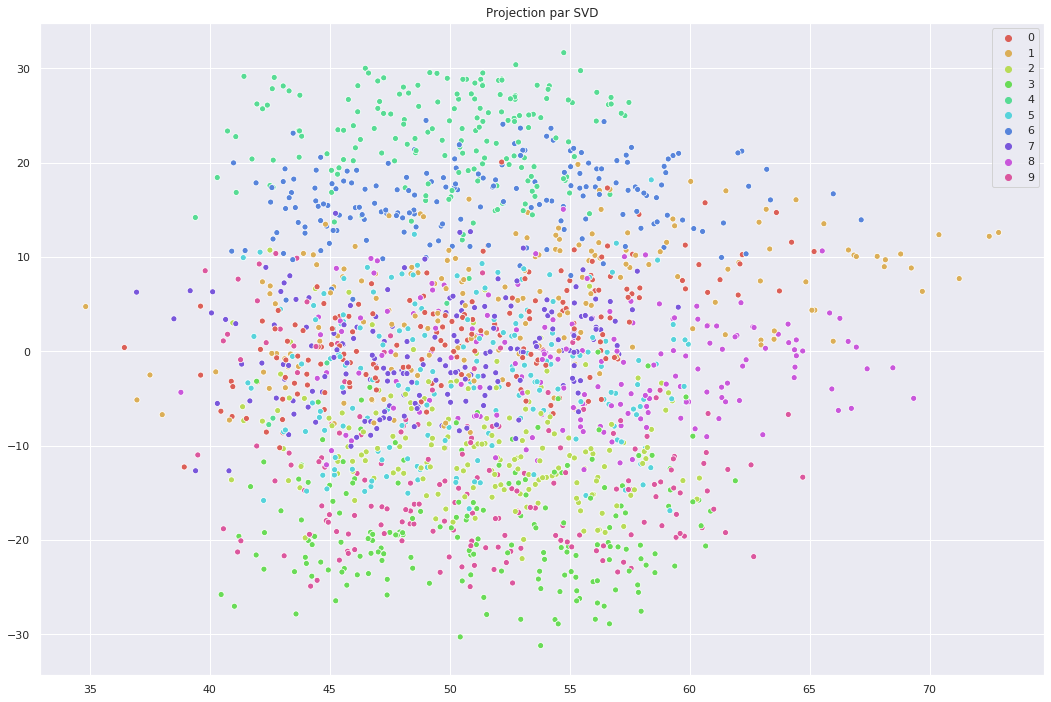

In [23]:
X_2d = sklearn.decomposition.TruncatedSVD(n_components=2).fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')
plt.title("Projection par SVD")

In [26]:
import sklearn.manifold
X_2d = sklearn.manifold.Isomap(n_components=2).fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')
plt.title("Projection par Isometric mapping")

Text(0.5, 1.0, 'Projection par Isometric mapping')

Text(0.5, 1.0, 'Projection par Locally Linear Embedding, method = hessian')

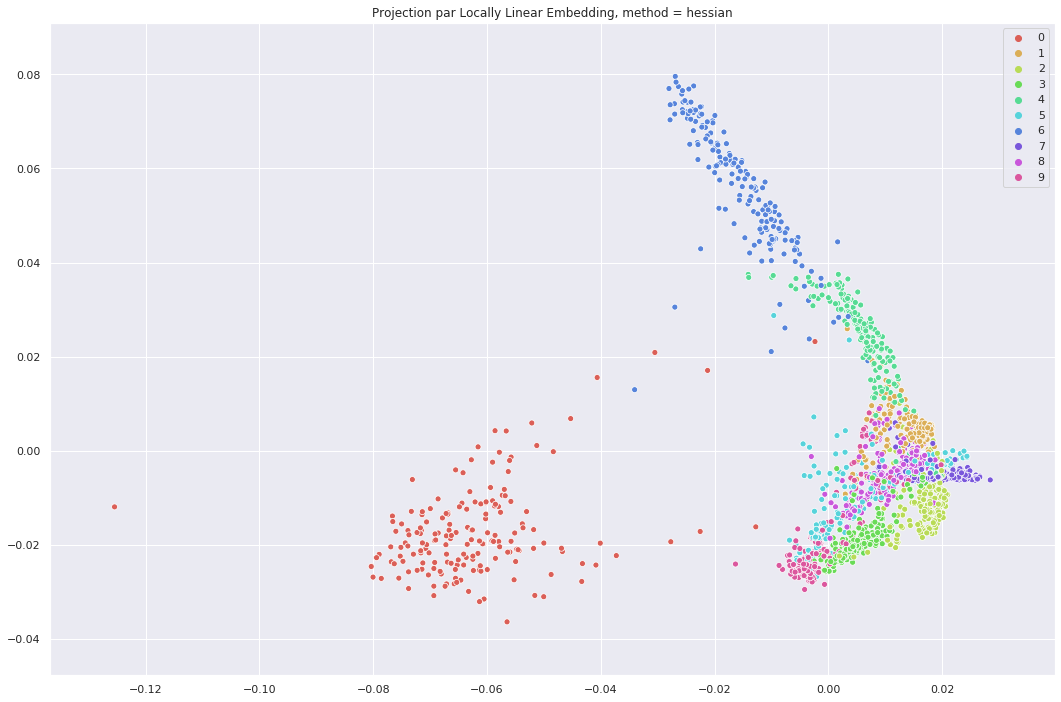

In [28]:
method='hessian'
X_2d = sklearn.manifold.LocallyLinearEmbedding(n_neighbors=100, n_components=2, method=method).fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')
plt.title("Projection par Locally Linear Embedding, method = {}".format(method))

Text(0.5, 1.0, 'Projection par Multi-Dimensional Scaling')

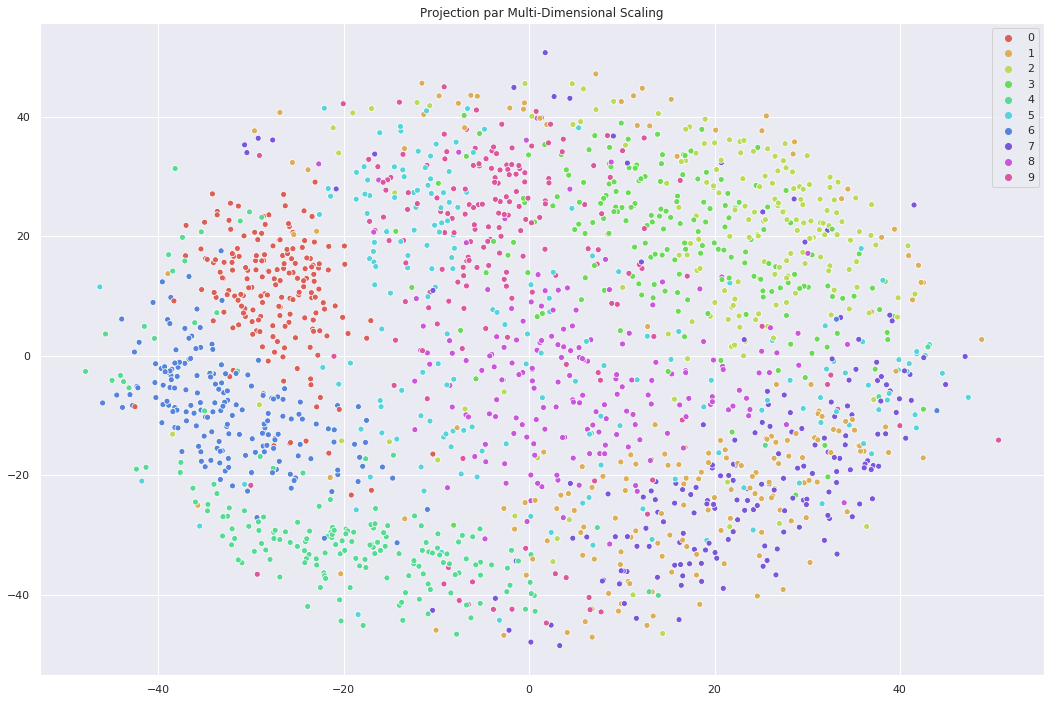

In [30]:
X_2d= sklearn.manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')
plt.title("Projection par Multi-Dimensional Scaling")

In [31]:
X_2d= sklearn.manifold.SpectralEmbedding(n_components=2, random_state=42, eigen_solver="arpack").fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')
plt.title("Projection par Spectral Embedding")

Text(0.5, 1.0, 'Projection par Spectral Embedding')

Text(0.5, 1.0, 'Projection par t-distributed Stochastic Neighbor Embedding')

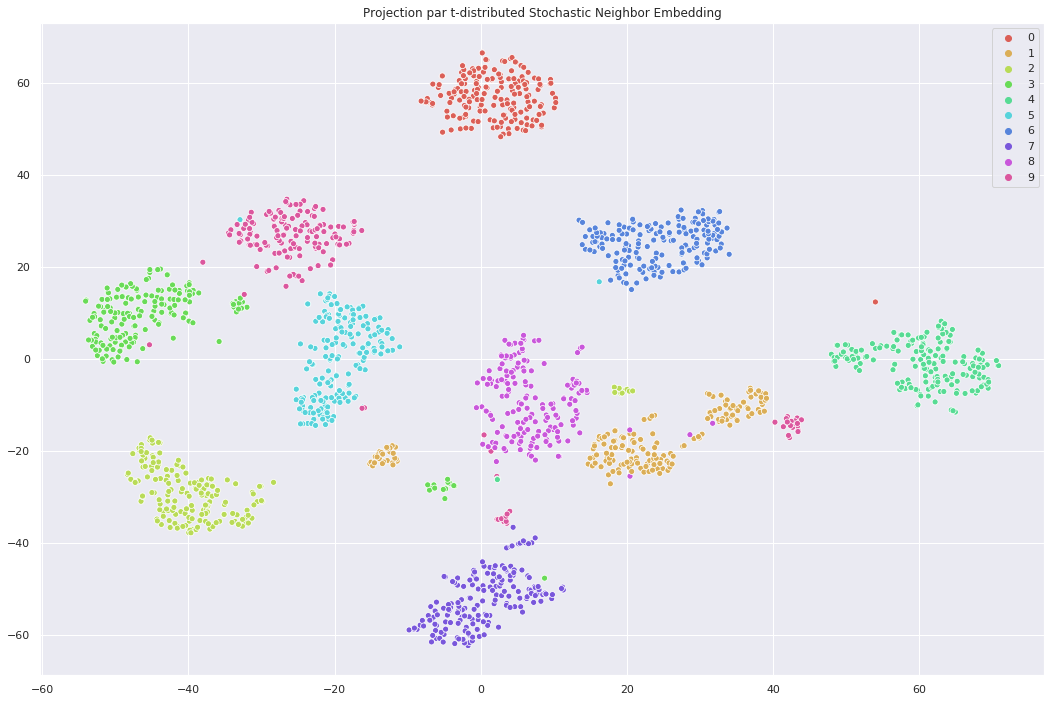

In [32]:
X_2d= sklearn.manifold.TSNE(n_components=2, init='pca', random_state=0).fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')
plt.title("Projection par t-distributed Stochastic Neighbor Embedding")

Text(0.5, 1.0, 'Projection par Linear Discriminant Analysis')

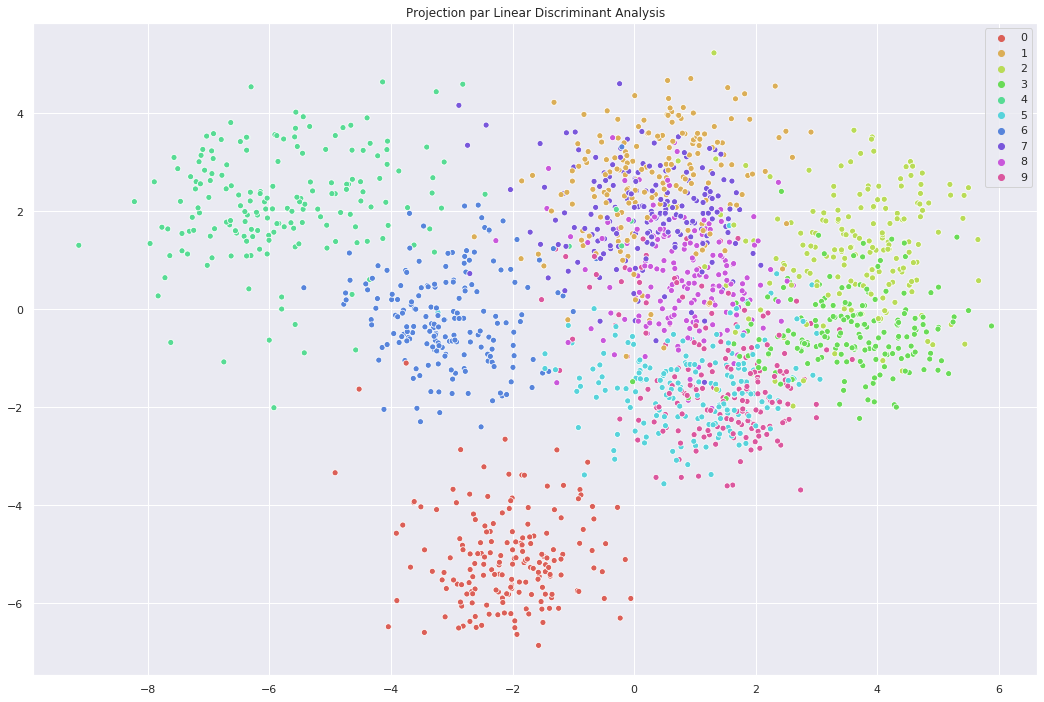

In [34]:
import sklearn.discriminant_analysis
X_2d = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette=sns.color_palette("hls", 10), legend='full')
plt.title("Projection par Linear Discriminant Analysis")

In [ ]:
X_3d = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=3).fit_transform(X, y)
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for digit in range(10):
    selected= (y==digit)
    ax.scatter(X_3d[selected, 0], X_3d[selected, 1], X_3d[selected,2], cmap=plt.cm.nipy_spectral, label=str(digit))
plt.legend()
plt.show()